# Task 1

### Adam Walicki 251656
### Emil Pierzchała 251611

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names = [
    'Sex', 'Length', 'Diameter', 'Height', 
    'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'
]
data = pd.read_csv('data.csv', header=None, names=column_names)

#### Table of the distribution of the qualitative variable

In [3]:
sex = data['Sex']
sex_category = {
    'M': 'Male',
    'F': 'Female',
    'I': 'Infant'
}
sex_mapped = sex.map(sex_category)
count = sex_mapped.value_counts()

s_dist = count.to_frame(name='count')
total_s_count = s_dist['count'].sum()

s_dist['%'] = (s_dist['count'] / total_s_count * 100).round(2)

s_dist

,count,%
Sex,,
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


#### Table with summary statistics for the quantitative variables

In [4]:
stats = data.describe(include='number')

stats.T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

,mean,std,min,25%,50%,75%,max
Length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole_weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked_weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera_weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell_weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


#### Bar chart of the counts of occurrences of each category for the qualitative variable

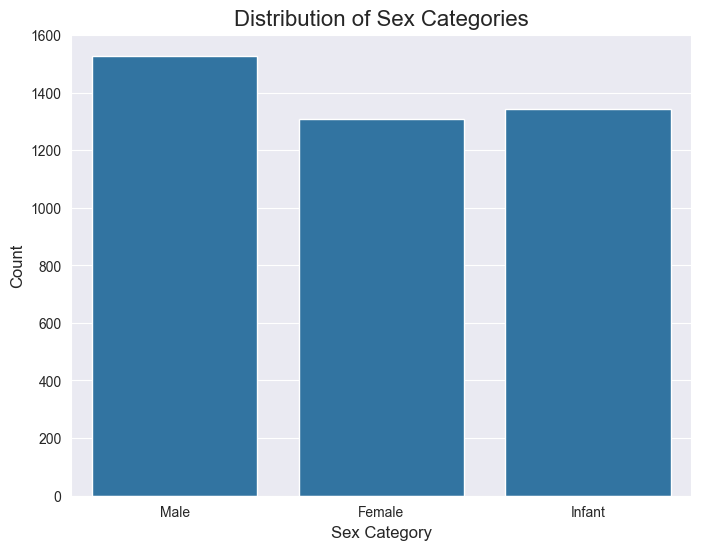

In [11]:
plt.figure(figsize=(8, 6))

data['Sex_Category'] = data['Sex'].map(sex_category)

barchart = sns.countplot(x='Sex_Category', data=data)

barchart.set_title('Distribution of Sex Categories', fontsize=16)
barchart.set_xlabel('Sex Category', fontsize=12)
barchart.set_ylabel('Count', fontsize=12)

plt.show()

#### Histogram of each quantitative variable

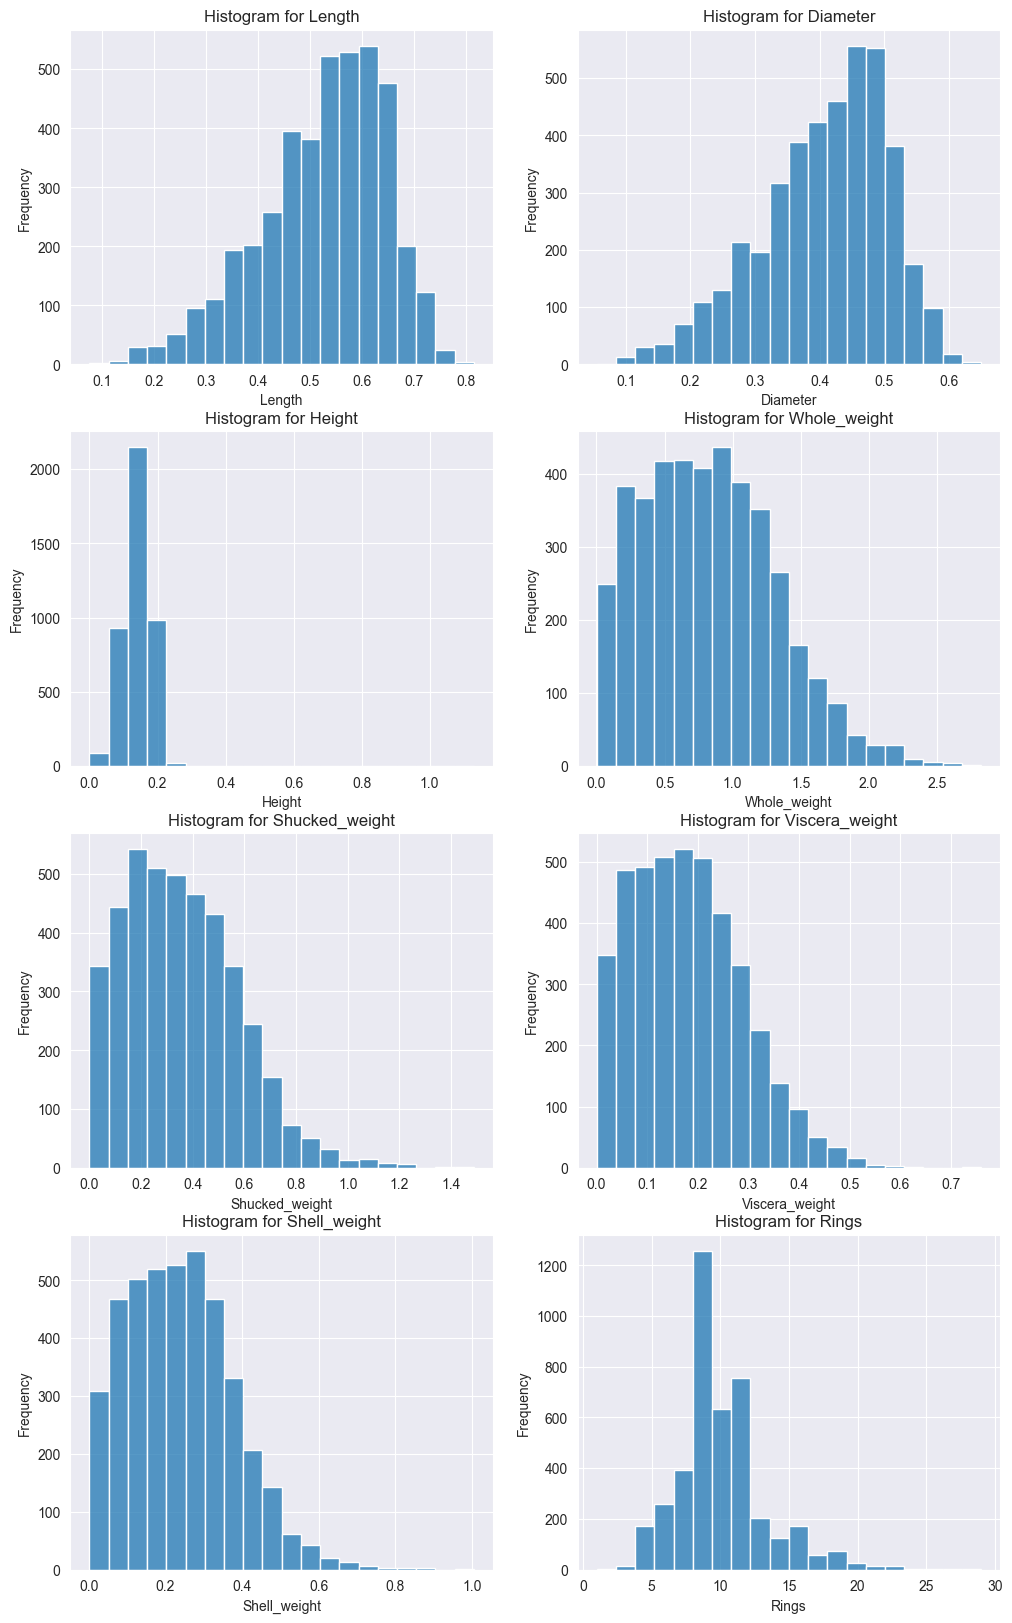

In [13]:
quantitative_vars = data.select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))
axes_flat = axes.flatten()

for i, col in enumerate(quantitative_vars):
    ax = axes_flat[i]
    
    sns.histplot(data=data, x=col, ax=ax, bins=20)
    
    ax.set_title(f'Histogram for {col}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.show()

#### Scatter plot for each pair of the quantitative variables

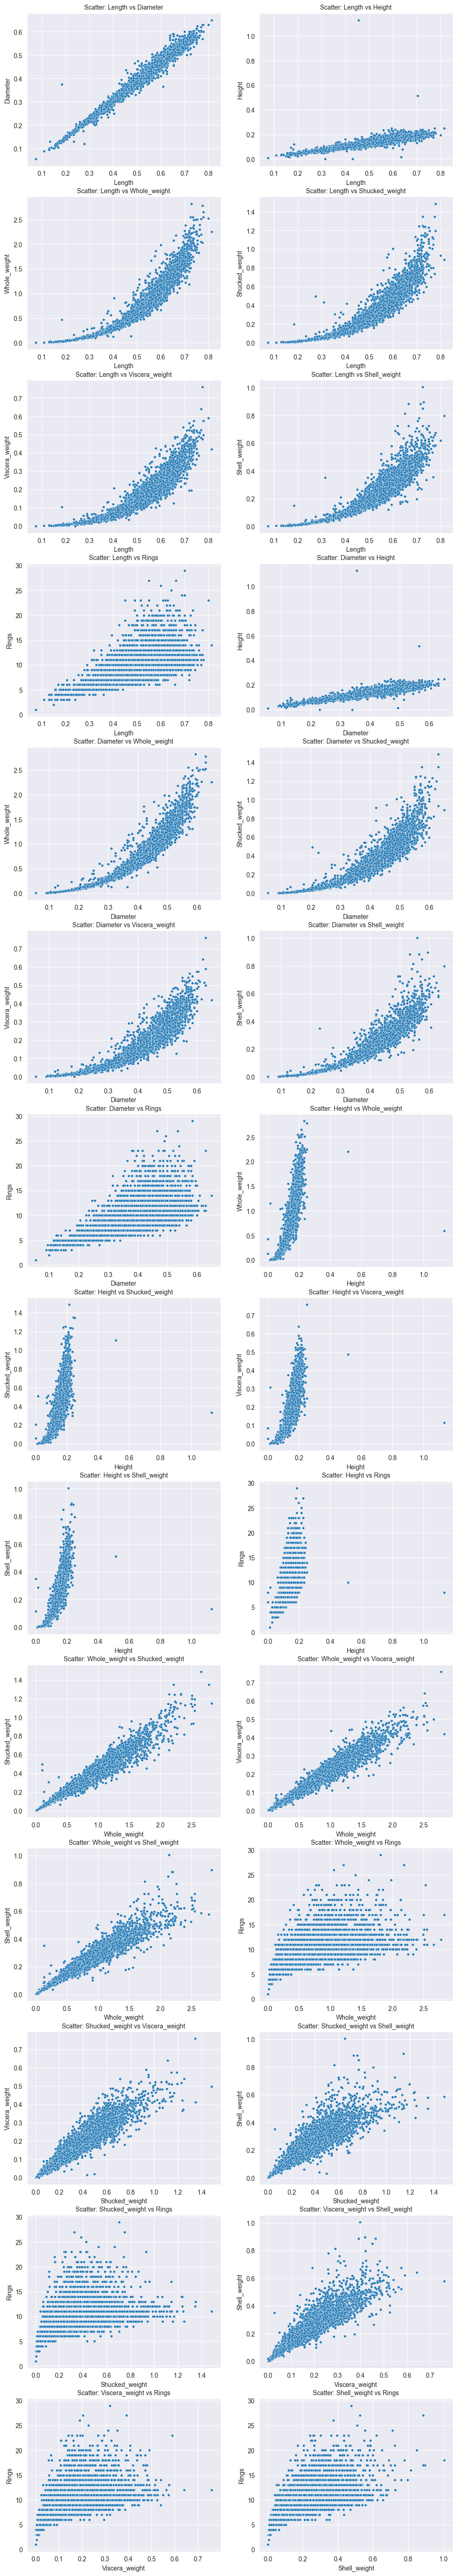

In [7]:
var_pairs = [
    (quantitative_vars[i], quantitative_vars[j]) 
    for i in range(len(quantitative_vars)) 
    for j in range(i + 1, len(quantitative_vars))
]

fig, axes = plt.subplots(nrows=14, ncols=2, figsize=(12, 72))
axes_flat = axes.flatten()

for i, pair in enumerate(var_pairs):
    var1, var2 = pair
    ax = axes_flat[i]
    
    sns.scatterplot(
        data=data,
        x=var1,
        y=var2,
        ax=ax,
        s=15
    )
    ax.set_title(f'Scatter: {var1} vs {var2}', fontsize=10)

plt.show()

#### Table representing a linear correlation matrix of all quantitative variables

In [8]:
quantitative_data = data.select_dtypes(include='number')

correlation_matrix = quantitative_data.corr()

correlation_matrix

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


#### Heatmap representing a linear correlation matrix of all quantitative variables

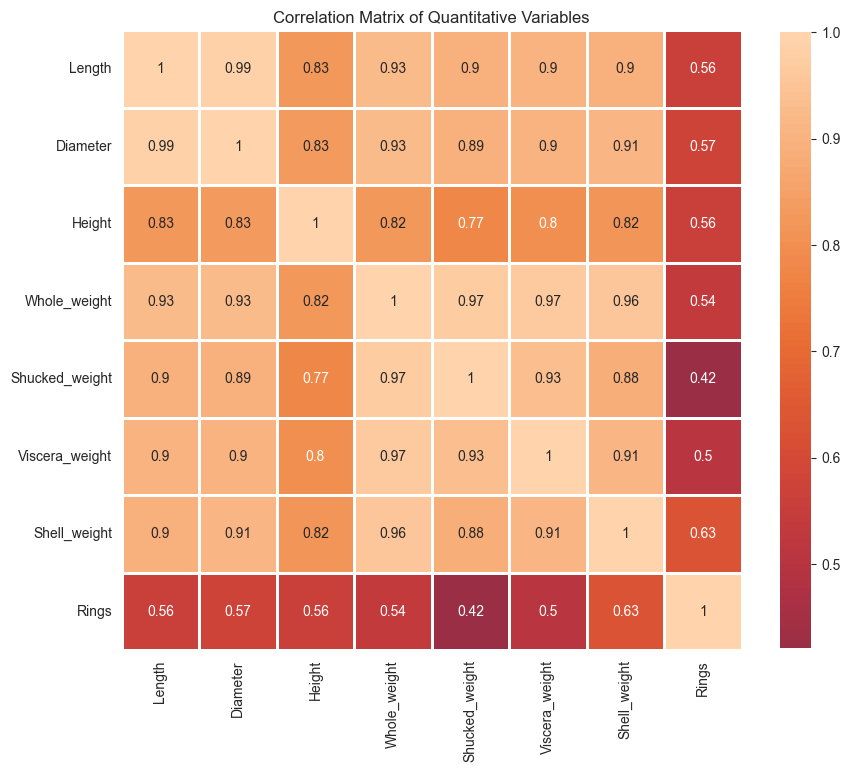

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, center=0,
            square=True, linewidths=.9, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Quantitative Variables')
plt.show()

#### Linear regression plot with the two quantitative variables

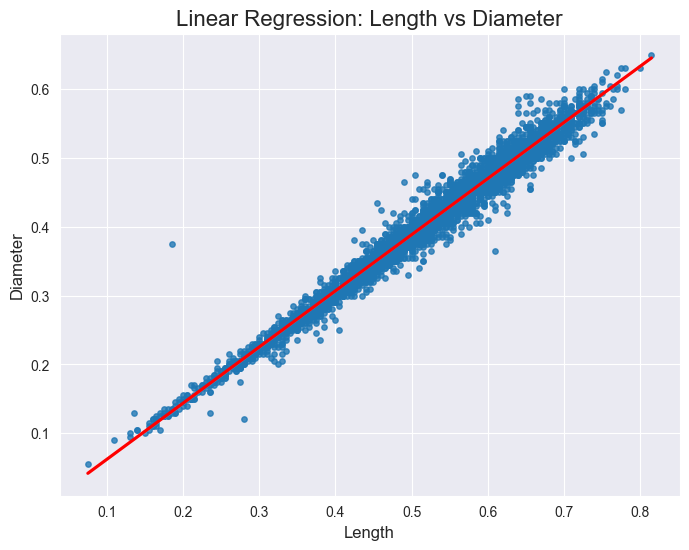

In [10]:
corr_stacked = correlation_matrix.abs().unstack()
corr_stacked = corr_stacked[corr_stacked < 1.0] 
corr_stacked = corr_stacked.sort_values(ascending=False)
top_pair = corr_stacked.index[0]  
var1 = top_pair[0]
var2 = top_pair[1]

plt.figure(figsize=(8, 6))
sns.regplot(data=data, x=var1, y=var2, scatter_kws={'s': 15}, line_kws={'color': 'red'})
plt.title(f'Linear Regression: {var1} vs {var2}', fontsize=16)
plt.xlabel(var1, fontsize=12)
plt.ylabel(var2, fontsize=12)
plt.show()